In [2]:
### Loan Prediction Problem: challenge is to predict approval status of loan (Approved/ Reject)

# VARIABLE DESCRIPTIONS
# ---------------------

#  Variable                   Description
#  Loan_ID                    Unique Loan ID
#  Gender                     Male/ Female
#  Married                    Applicant married (Y/N)
#  Dependents                 Number of dependents
#  Education                  Applicant Education (Graduate/ Under Graduate)
#  Self_Employed              Self employed (Y/N)
#  ApplicantIncome            Applicant income
#  CoapplicantIncome          Coapplicant income
#  LoanAmount                 Loan amount in thousands
#  Loan_Amount_Term           Term of loan in months
#  Credit_History             credit history meets guidelines
#  Property_Area              Urban/ Semi Urban/ Rural
#  Loan_Status                Loan approved (Y/N)

In [3]:
# Libraries used : numpy matplotlib pandas sklearn 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cross_validation import KFold   
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline 

In [5]:
##### Exploratory analysis in Python using Pandas

In [7]:
# Training Data
df = pd.read_csv("train.csv")


In [8]:
#  look at few top rows 
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


In [11]:
# summary of numerical fields
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#    LoanAmount has (614 – 592) 22 missing values.
#    Loan_Amount_Term has (614 – 600) 14 missing values.
#    Credit_History has (614 – 564) 50 missing values.
#    About 84% applicants have a credit_history. 
#           The mean of Credit_History field is 0.84 
#           Credit_History has value 1 for those who have a credit history and 0 otherwise

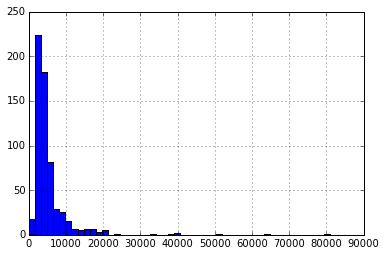

In [12]:
# plotting the histogram of ApplicantIncome 

df['ApplicantIncome'].hist(bins=50)

/usr/local/lib/python2.7/dist-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x7f7416c64d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7416c74ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7416c0b210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7416c01b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7416c741d0>,
  <matplotlib.lines.Line2D at 0x7f7416c74890>]}

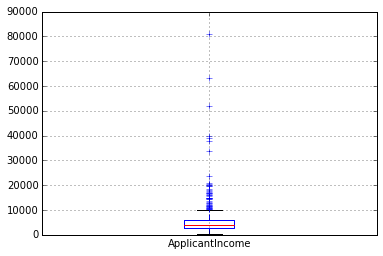

In [13]:
# Box plot 
df.boxplot(column='ApplicantIncome')
# presence of a lot of outliers/extreme values.

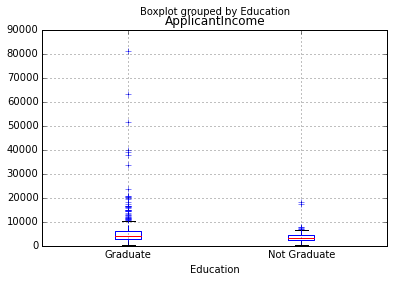

In [14]:
df.boxplot(column='ApplicantIncome', by = 'Education')

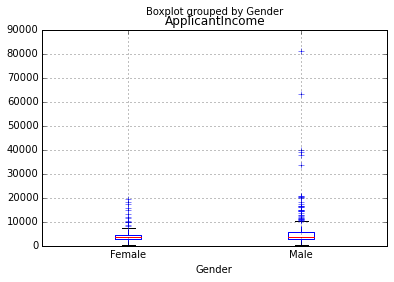

In [15]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

In [17]:
##### Data Munging in Python

In [18]:
# Find number of missing values in each column 
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# LoanAmount : replacement by mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0) 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

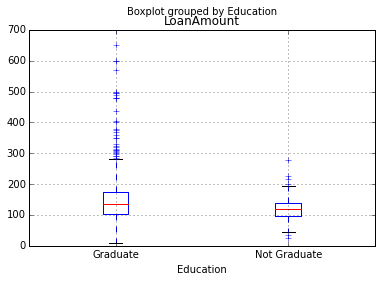

In [20]:
# Other methods
df.boxplot(column='LoanAmount', by = 'Education')

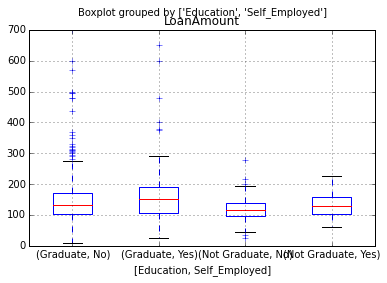

In [21]:
df.boxplot(column='LoanAmount', by = ['Education','Self_Employed'])

In [25]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Credit_History'].fillna(0,inplace=True)

In [26]:
# Encoding
from sklearn.preprocessing import LabelEncoder
fields = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in fields:
    df[i] = le.fit_transform(df[i])
df.head(10)

/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,1,0,0,5849,0,146.412162,360,1,2,1
1,LP001003,2,2,2,0,0,4583,1508,128.000000,360,1,0,0
2,LP001005,2,2,1,0,1,3000,0,66.000000,360,1,2,1
3,LP001006,2,2,1,1,0,2583,2358,120.000000,360,1,2,1
4,LP001008,2,1,1,0,0,6000,0,141.000000,360,1,2,1
5,LP001011,2,2,3,0,1,5417,4196,267.000000,360,1,2,1
6,LP001013,2,2,1,1,0,2333,1516,95.000000,360,1,2,1
7,LP001014,2,2,4,0,0,3036,2504,158.000000,360,0,1,0
8,LP001018,2,2,3,0,0,4006,1526,168.000000,360,1,2,1
9,LP001020,2,2,2,0,0,12841,10968,349.000000,360,1,1,0


In [ ]:
##### Building a Predictive Model in Python

In [28]:
def predict_model(model, data, predictors, outcome):
  '''Loan prediction model'''
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

In [29]:
predictor_var = ['Credit_History']

# Logistic regression model
outcome_var = 'Loan_Status'
model = LogisticRegression()
predict_model(model, df,predictor_var,outcome_var)

Accuracy : 77.036%


In [30]:
# Decision Tree Model
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
predict_model(model, df,predictor_var,outcome_var)

Accuracy : 77.199%


In [31]:
# Random Forest Model
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
predict_model(model, df,predictor_var,outcome_var)

Accuracy : 86.156%
